<a href="https://colab.research.google.com/github/vinayreddy115/vinay.github.io/blob/master/kpmg2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import timedelta
!pip install squarify
import squarify


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Transactions = pd.read_excel("/content/drive/My Drive/KPMG_VI_New_raw_data_update_final2.xlsx","Transactions")
CustomerDemographic = pd.read_excel("/content/drive/My Drive/KPMG_VI_New_raw_data_update_final2.xlsx","CustomerDemographic")
CustomerAddress = pd.read_excel("/content/drive/My Drive/KPMG_VI_New_raw_data_update_final2.xlsx","CustomerAddress")
NewCustomerList = pd.read_excel("/content/drive/My Drive/KPMG_VI_New_raw_data_update_final2.xlsx","NewCustomerList")


In [ ]:
Transactions.head(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [ ]:
CustomerDemographic.head(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1.0,Laraine,Medendorp,Female,93,1953-10-12,66.0,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2.0,Eli,Bockman,Male,81,1980-12-16,39.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3.0,Arlin,Dearle,Male,61,1954-01-20,66.0,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4.0,Talbot,NaN,Male,33,1961-10-03,58.0,NaN,IT,Mass Customer,N,No,7.0
4,5.0,Sheila-kathryn,Calton,Female,56,1977-05-13,43.0,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [ ]:
CustomerAddress.head(5)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
NewCustomerList.head(5)

,first_name,last_name,Name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Rank,Value
0,Chickie,Brister,Chickie Brister,Male,86,1957-07-12,63.0,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1.00,1.2500,1.5625,1.328125,1,1,1.718750
1,Morly,Genery,Morly Genery,Male,69,1970-03-22,50.0,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.47,0.4700,0.5875,0.499375,1,1,1.718750
2,Ardelis,Forrester,Ardelis Forrester,Female,10,1974-08-28,45.0,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,0.49,0.4900,0.4900,0.490000,1,1,1.718750
3,Lucine,Stutt,Lucine Stutt,Female,64,1979-01-28,41.0,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.69,0.8625,0.8625,0.862500,4,4,1.703125
4,Melinda,Hadlee,Melinda Hadlee,Female,34,1965-09-21,54.0,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.81,0.8100,1.0125,1.012500,4,4,1.703125


In [ ]:
Tran_Dem= Transactions.merge(CustomerDemographic,how="left",left_on='customer_id',right_on='customer_id')
Tran_Dem_add = Tran_Dem.merge(CustomerAddress,how='left',left_on='customer_id',right_on='customer_id')
Tran_Dem_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       20000 non-null  int64         
 1   product_id                           20000 non-null  int64         
 2   customer_id                          20000 non-null  int64         
 3   transaction_date                     20000 non-null  datetime64[ns]
 4   online_order                         19640 non-null  float64       
 5   order_status                         20000 non-null  object        
 6   brand                                19803 non-null  object        
 7   product_line                         19803 non-null  object        
 8   product_class                        19803 non-null  object        
 9   product_size                         19803 non-null  object        
 10  list_price

In [ ]:
#missing values
for var in CustomerDemographic.columns:
    if CustomerDemographic[var].isnull().sum() > 0:
        print(var, "{:.2f}".format(CustomerDemographic[var].isnull().mean()),'%' )


customer_id 0.00 %
last_name 0.03 %
DOB 0.02 %
Age 0.02 %
job_title 0.13 %
job_industry_category 0.16 %
tenure 0.02 %


In [ ]:
#data = Tran_Dem_add.dropna()
#data.shape

# Unique customer ids from transaction joined table

In [ ]:
data = Transactions
unique = data.groupby(['customer_id']).agg({
        'customer_id': 'count'})

In [ ]:
unique = unique.values
unique = pd.DataFrame(unique)
unique.columns = ['customer_id']
unique


,customer_id
0,11
1,3
2,8
3,2
4,6
...,...
3489,3
3490,6
3491,7
3492,6


# RMF

In [ ]:
data['transaction_date'] = pd.to_datetime(data['transaction_date'])

In [ ]:
print('Transactions timeframe from {} to {}'.format(data['transaction_date'].min(),
                                    data['transaction_date'].max()))

Transactions timeframe from 2017-01-01 00:00:00 to 2017-12-30 00:00:00


In [ ]:
# Create snapshot date
snapshot_date = data['transaction_date'].max() + timedelta(days=1)
print(snapshot_date)

2017-12-31 00:00:00


In [ ]:
data['Profit'] = data['list_price'] - data['standard_cost']
# Grouping by CustomerID
data_profit = data.groupby(['customer_id']).agg({
        'Profit': 'sum'})

In [ ]:
data_profit.sort_values('Profit',ascending=False).head()

,Profit
customer_id,
941,11668.95
2637,11222.65
1460,10787.60
1558,10640.30
729,10497.78


In [ ]:
# Grouping by CustomerID
data_process = data.groupby(['customer_id']).agg({
        'transaction_date': lambda x: (snapshot_date - x.max()).days,
        'transaction_id': 'count',
        'list_price': 'sum'})

In [ ]:
# Rename the columns 
data_process.rename(columns={'transaction_date': 'Recency',
                         'transaction_id': 'Frequency',
                         'list_price': 'MonetaryValue'}, inplace=True)

In [ ]:
# Print top 5 rows and shape of dataframe
print(data_process.head())
print('{:,} rows; {:,} columns'
      .format(data_process.shape[0], data_process.shape[1]))

             Recency  Frequency  MonetaryValue
customer_id                                   
1                  8         11        9084.45
2                129          3        4149.07
3                103          8        9888.23
4                196          2        1047.72
5                 17          6        5903.20
3,494 rows; 3 columns


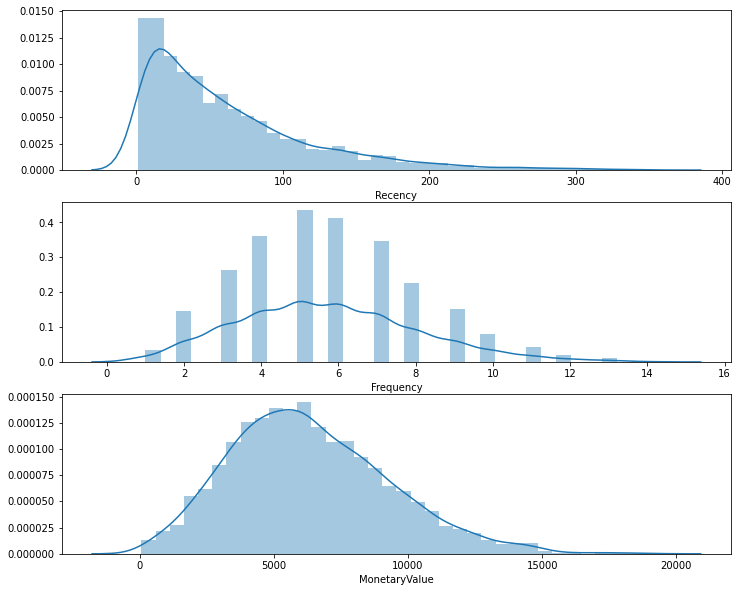

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(data_process['Recency'])# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(data_process['Frequency'])# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(data_process['MonetaryValue'])# Show the plot
plt.show()

In [ ]:
# Create labels for Recency and Frequency
r_labels = range(3, 0, -1); f_labels = range(1, 4)

# Assign these labels to three equal percentile groups 
r_groups = pd.qcut(data_process['Recency'], q=3, labels=r_labels)

# Assign these labels to three equal percentile groups 
f_groups = pd.qcut(data_process['Frequency'], q=3, labels=f_labels)

# Create new columns R and F
data_process = data_process.assign(R=r_groups.values, F=f_groups.values)


# Create labels for MonetaryValue 
m_labels = range(1, 4)

# Assign these labels to three equal percentile groups
m_groups = pd.qcut(data_process['MonetaryValue'], q=3, labels=m_labels)

# Create new column M
data_process = data_process.assign(M=m_groups.values)

# Calculate RFM_Score
data_process['RFM_Score'] = data_process[['R','F','M']].sum(axis=1)


In [ ]:
data_process

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Score
customer_id,,,,,,,
1,8,11,9084.45,3,3,3,9.0
2,129,3,4149.07,1,1,1,3.0
3,103,8,9888.23,1,3,3,7.0
4,196,2,1047.72,1,1,1,3.0
5,17,6,5903.20,3,2,2,7.0
...,...,...,...,...,...,...,...
3497,53,3,3744.07,2,1,1,4.0
3498,128,6,5177.06,1,2,2,5.0
3499,52,7,7673.48,2,2,3,7.0


# K means

Text(0, 0.5, 'Inertia')

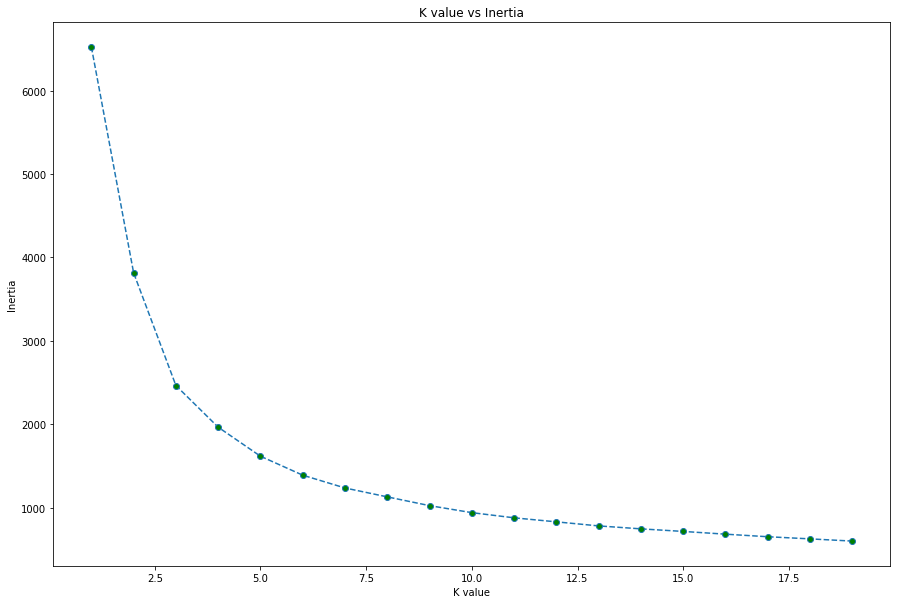

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler,StandardScaler

# Scaling with Robust Scaler
rfm_model = data_process[['Recency','Frequency','MonetaryValue']]
standar = RobustScaler()
standar.fit(rfm_model)
rfm_model = standar.transform(rfm_model)
rfm_model = pd.DataFrame(rfm_model, columns=['Recency','Frequency','MonetaryValue'])
rfm_model['CustomerId'] = data_process.index

# Find K best with Elbow Method 
## Modeling with KMeans
inertia_list = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(rfm_model[['Recency','Frequency','MonetaryValue']])
    inertia_list.append(kmeans.inertia_)
    
# Show graph elbow method
plt.figure(figsize=(15,10))
plt.plot(range(1,20),inertia_list,marker='o',markerfacecolor='green',linestyle='dashed')
plt.title('K value vs Inertia')
plt.xlabel('K value')
plt.ylabel('Inertia')

In [ ]:
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(rfm_model[['Recency','Frequency','MonetaryValue']])
    cluster_labels = kmeans.labels_

In [ ]:
rfm_model['cluster'] = cluster_labels
rfm_model.head()

,Recency,Frequency,MonetaryValue,CustomerId,cluster
0,-0.544118,1.666667,0.762421,1,1
1,1.235294,-1.000000,-0.468210,2,2
2,0.852941,0.666667,0.962843,3,1
3,2.220588,-1.333333,-1.241527,4,2
4,-0.411765,0.000000,-0.030820,5,0


In [ ]:
# Grouping by CustomerID
rfm_model1 = rfm_model.groupby(['cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'MonetaryValue': 'mean',
        'CustomerId':'count'
        })

In [ ]:
rfm_model1

,Recency,Frequency,MonetaryValue,CustomerId
cluster,,,,
0,-0.046903,-0.433137,-0.278453,1700
1,-0.081006,0.736739,0.871137,1194
2,1.733971,-0.774444,-0.487910,600


In [ ]:
data_process.shape

(3494, 3)

In [ ]:
rfm_model.shape

(3494, 5)

# MErging Dem and Adress 

In [ ]:
Dem_adress= CustomerAddress.merge(CustomerDemographic,how="left",left_on='customer_id',right_on='customer_id')
Dem_adress.shape

(3999, 18)

In [ ]:
# Customers who made transactions

In [ ]:
test_train= unique.merge(Dem_adress,how="left",left_on='customer_id',right_on='customer_id')
test_train.shape

(3494, 18)

In [ ]:
 data = test_train.drop(['customer_id','state','address','country','first_name','last_name','DOB','deceased_indicator','tenure'],axis = 1)

In [ ]:
data

,postcode,property_valuation,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car
0,3044.0,8.0,Male,99.0,66.0,NaN,Property,Mass Customer,No
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2650.0,4.0,Male,31.0,58.0,Media Manager I,NaN,Mass Customer,No
3,2153.0,10.0,Male,81.0,39.0,Administrative Officer,Financial Services,Mass Customer,Yes
4,3216.0,9.0,Male,35.0,53.0,NaN,Retail,High Net Worth,Yes
...,...,...,...,...,...,...,...,...,...
3489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3490,3216.0,9.0,Male,35.0,53.0,NaN,Retail,High Net Worth,Yes
3491,2210.0,9.0,Female,6.0,44.0,NaN,Financial Services,Affluent Customer,Yes
3492,3216.0,9.0,Male,35.0,53.0,NaN,Retail,High Net Worth,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 0 to 3493
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   postcode                             3021 non-null   float64
 1   property_valuation                   3021 non-null   float64
 2   gender                               3021 non-null   object 
 3   past_3_years_bike_related_purchases  3021 non-null   float64
 4   Age                                  3021 non-null   float64
 5   job_title                            1417 non-null   object 
 6   job_industry_category                2109 non-null   object 
 7   wealth_segment                       3021 non-null   object 
 8   owns_car                             3021 non-null   object 
 9   cluster                              3494 non-null   int32  
dtypes: float64(4), int32(1), object(5)
memory usage: 446.6+ KB


In [ ]:
#data5 = data.drop(data.index[3493])


# Making  data set to predict RMF scores 





In [ ]:
Val_data=NewCustomerList.drop(['first_name','last_name','Name','DOB','deceased_indicator','tenure','address','country',
                               'state','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Rank','Value'],axis=1)

In [ ]:
Val_data.columns

Index(['gender', 'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'property_valuation'],
      dtype='object')

In [ ]:
Val_data.shape

(1000, 9)

In [ ]:
cluster_labels

array([1, 2, 1, ..., 1, 2, 0], dtype=int32)

# assigning RMF to  data

In [ ]:
data['cluster'] = cluster_labels

In [ ]:
data.shape

(3494, 10)

In [ ]:
data.head()

,postcode,property_valuation,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,cluster
0,3044.0,8.0,Male,99.0,66.0,NaN,Property,Mass Customer,No,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2650.0,4.0,Male,31.0,58.0,Media Manager I,NaN,Mass Customer,No,1
3,2153.0,10.0,Male,81.0,39.0,Administrative Officer,Financial Services,Mass Customer,Yes,2
4,3216.0,9.0,Male,35.0,53.0,NaN,Retail,High Net Worth,Yes,0


Index(['gender', 'past_3_years_bike_related_purchases', 'Age', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'postcode',
       'property_valuation'],
      dtype='object')

In [ ]:
#missing values
for var in data.columns:
    if data[var].isnull().sum() > 0:
        print(var, "{:.2f}".format(data[var].isnull().mean()),'%' )

postcode 0.14 %
property_valuation 0.14 %
gender 0.14 %
past_3_years_bike_related_purchases 0.14 %
Age 0.14 %
job_title 0.59 %
job_industry_category 0.40 %
wealth_segment 0.14 %
owns_car 0.14 %


,postcode,property_valuation,gender,past_3_years_bike_related_purchases,Age,job_title,job_industry_category,wealth_segment,owns_car,cluster
3,2153.0,10.0,Male,81.0,39.0,Administrative Officer,Financial Services,Mass Customer,Yes,2
24,4557.0,4.0,Male,58.0,26.0,Nuclear Power Engineer,Manufacturing,Mass Customer,No,1
28,2023.0,12.0,Female,97.0,47.0,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,1
33,2023.0,12.0,Female,97.0,47.0,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,1
35,2153.0,10.0,Male,81.0,39.0,Administrative Officer,Financial Services,Mass Customer,Yes,2
...,...,...,...,...,...,...,...,...,...,...
3443,2023.0,12.0,Female,97.0,47.0,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,1
3444,2153.0,10.0,Male,81.0,39.0,Administrative Officer,Financial Services,Mass Customer,Yes,0
3452,2023.0,12.0,Female,97.0,47.0,Business Systems Development Analyst,Argiculture,Affluent Customer,Yes,1
3456,2153.0,10.0,Male,81.0,39.0,Administrative Officer,Financial Services,Mass Customer,Yes,0


# test train split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data5.drop('RFM_level',axis=1), data5['RFM_level'], test_size=0.2, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(data5.drop('RFM_level',axis=1), data5['RFM_level'], test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

In [ ]:
print(f'Train size is {X_train.shape}' )
print(f'Test size is {X_test.shape}' )

Train size is (2095, 9)
Test size is (699, 9)


In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data5)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
#Dropping tenure and property_valuation as they both have high correlation with age and postal code respectively.
data5 = data5.drop(['property_valuation'],axis=1)

In [ ]:
data = data5
data.shape

(3493, 9)

In [ ]:
data

In [ ]:
#missing values
for var in data5.columns:
    if data5[var].isnull().sum() > 0:
        print(var, "{:.2f}".format(data5[var].isnull().mean()),'%' )

postcode 0.00 %
property_valuation 0.00 %
gender 0.00 %
past_3_years_bike_related_purchases 0.00 %
Age 0.02 %
job_title 0.12 %
job_industry_category 0.16 %
wealth_segment 0.00 %
owns_car 0.00 %


In [ ]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data.columns if data[var].dtype!='O'  and data[var].nunique()<10]
continuous = [var for var in data.columns if data[var].dtype!='O' ]

# categorical
categorical = [var for var in data.columns if data[var].dtype=='O' ]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 0 discrete variables
There are 3 continuous variables
There are 6 categorical variables


# Pre processing

In [ ]:
!pip install feature_engine

from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.variable_transformers import YeoJohnsonTransformer as YJT
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi


In [ ]:
model_preprocess = Pipeline([              
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean'
                                          )),                    
    ('imputer_cat', mdi.CategoricalVariableImputer()),
    # categorical encoding 
    ('OneHotCategoricalEncoder',OneHotCategoricalEncoder()),
    ('power_transform',YJT()),   #transforms variables as most of the variables are not in normal this also fixes some of the outliers
    ('scale',RobustScaler())      #scalling the values
])

In [ ]:
discrete

[]

In [ ]:
model_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['postcode', 'property_valuation',
                                              'past_3_years_bike_related_purchases',
                                              'Age'])),
                ('imputer_cat',
                 CategoricalVariableImputer(fill_value='Missing',
                                            imputation_method='missing',
                                            return_object=False,
                                            variables=['gender', 'job_title',
                                                       'job_industry_category',
                                                       'wealth...
                                                  'Assistant II',
                                                  'job_title_Human Resources '
                                                  'Assistan

In [ ]:
# Apply Transformations
X_train=model_preprocess.transform(X_train)
X_test=model_preprocess.transform(X_test)

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

rfc =RandomForestClassifier(random_state=42,bootstrap=True)
rfc_param = { 
     'n_estimators': [100,200],
    'max_features': ['auto'],
    'max_depth' : range(1,10),
  #  'criterion' :['entropy']
}

rfc_grid2 = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True )
rfc_grid2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print(f'Best Mean Cross Validation Score is {rfc_grid2.best_score_}')
print(f'Best Parameters: {rfc_grid2.best_params_}')
print(f'Train score is {rfc_grid2.score(X_train,y_train)}')
print(f'Test score is {rfc_grid2.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.6381861575178998
Best Parameters: {'max_depth': 1, 'max_features': 'auto', 'n_estimators': 100}
Train score is 0.6381861575178998
Test score is 0.6394849785407726


In [ ]:
test = model_preprocess.transform(Val_data)


In [ ]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
>>> from sklearn.svm import LinearSVC
svc =OneVsRestClassifier(LinearSVC(random_state=0))
svc_param = { 
  #  'tol':[0.0001,.001,.01], 
   # 'LinearSVC__C':[1,10,100], 
}

svc_grid2 = GridSearchCV(svc, svc_param,cv=5, return_train_score=True )
svc_grid2.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=OneVsRestClassifier(estimator=LinearSVC(C=1.0,
                                                               class_weight=None,
                                                               dual=True,
                                                               fit_intercept=True,
                                                               intercept_scaling=1,
                                                               loss='squared_hinge',
                                                               max_iter=1000,
                                                               multi_class='ovr',
                                                               penalty='l2',
                                                               random_state=0,
                                                               tol=0.0001,
                                                               verbose=0),
                    

In [ ]:
print(f'Best Mean Cross Validation Score is {svc_grid2.best_score_}')
print(f'Best Parameters: {svc_grid2.best_params_}')
print(f'Train score is {svc_grid2.score(X_train,y_train)}')
print(f'Test score is {svc_grid2.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.6372315035799523
Best Parameters: {}
Train score is 0.6381861575178998
Test score is 0.6394849785407726


In [ ]:
svc_grid2.predict(test)

In [ ]:
>>> from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC
svc =OneVsOneClassifier(LinearSVC(random_state=0))
svc_param = { 
  #  'tol':[0.0001,.001,.01], 
   # 'LinearSVC__C':[1,10,100], 
}

svc_grid3 = GridSearchCV(svc, svc_param,cv=5, return_train_score=True )
svc_grid3.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=OneVsOneClassifier(estimator=LinearSVC(C=1.0,
                                                              class_weight=None,
                                                              dual=True,
                                                              fit_intercept=True,
                                                              intercept_scaling=1,
                                                              loss='squared_hinge',
                                                              max_iter=1000,
                                                              multi_class='ovr',
                                                              penalty='l2',
                                                              random_state=0,
                                                              tol=0.0001,
                                                              verbose=0),
                                

In [ ]:
print(f'Best Mean Cross Validation Score is {svc_grid3.best_score_}')
print(f'Best Parameters: {svc_grid3.best_params_}')
print(f'Train score is {svc_grid3.score(X_train,y_train)}')
print(f'Test score is {svc_grid3.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.637708830548926
Best Parameters: {}
Train score is 0.6381861575178998
Test score is 0.6394849785407726


In [ ]:
svc_grid3.predict(test)

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression( multi_class= 'multinomial')
lr_parm = { 
  #  'tol':[0.0001,.001,.01], 
   # 'LinearSVC__C':[1,10,100], 
}

lr_grid = GridSearchCV(svc, lr_parm,cv=5, return_train_score=True )
lr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=OneVsOneClassifier(estimator=LinearSVC(C=1.0,
                                                              class_weight=None,
                                                              dual=True,
                                                              fit_intercept=True,
                                                              intercept_scaling=1,
                                                              loss='squared_hinge',
                                                              max_iter=1000,
                                                              multi_class='ovr',
                                                              penalty='l2',
                                                              random_state=0,
                                                              tol=0.0001,
                                                              verbose=0),
                                

In [ ]:
print(f'Best Mean Cross Validation Score is {lr_grid.best_score_}')
print(f'Best Parameters: {lr_grid.best_params_}')
print(f'Train score is {lr_grid.score(X_train,y_train)}')
print(f'Test score is {lr_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.637708830548926
Best Parameters: {}
Train score is 0.6381861575178998
Test score is 0.6394849785407726


In [ ]:
lr_grid.predict(test)

# we can see that members in  cluster 2 are important 

In [ ]:
rfm_model1

,Recency,Frequency,MonetaryValue,CustomerId
cluster,,,,
0,-0.046974,-0.433392,-0.278884,1699
1,-0.080876,0.736123,0.870788,1195
2,1.733971,-0.774444,-0.487910,600


In [ ]:
cluster_labels.shape

(3494,)

In [ ]:
rfm_model

,Recency,Frequency,MonetaryValue,CustomerId,cluster
0,-0.544118,1.666667,0.762421,1,1
1,1.235294,-1.000000,-0.468210,2,2
2,0.852941,0.666667,0.962843,3,1
3,2.220588,-1.333333,-1.241527,4,2
4,-0.411765,0.000000,-0.030820,5,0
...,...,...,...,...,...
3489,0.117647,-1.000000,-0.569196,3497,0
3490,1.220588,0.000000,-0.211882,3498,2
3491,0.102941,0.333333,0.410598,3499,1
3492,1.470588,0.000000,-0.275378,3500,2


In [ ]:
test_train_cluster= test_train.merge(rfm_model,how="left",left_on='customer_id',right_on='CustomerId')
test_train_cluster.shape

(3494, 23)

In [ ]:
test_train_cluster= test_train_cluster.merge(data_process,how="left",left_on='customer_id',right_on='customer_id')
test_train_cluster.shape

(3494, 30)

In [ ]:
test_train_cluster

,customer_id,address,postcode,state,country,property_valuation,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Recency_x,Frequency_x,MonetaryValue_x,CustomerId,cluster,Recency_y,Frequency_y,MonetaryValue_y,R,F,M,RFM_Score
0,11,93405 Ludington Park,3044.0,VIC,Australia,8.0,Uriah,Bisatt,Male,99.0,1954-04-30,66.0,NaN,Property,Mass Customer,N,No,9.0,0.029412,0.000000,0.187670,11,0,47,6,6779.44,2,2,2,6.0
1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852941,0.666667,0.962843,3,1,103,8,9888.23,1,3,3,7.0
2,8,49 Londonderry Lane,2650.0,NSW,Australia,4.0,Rod,Inder,Male,31.0,1962-03-30,58.0,Media Manager I,NaN,Mass Customer,N,No,7.0,-0.323529,1.333333,1.495584,8,1,23,10,12024.76,3,3,3,9.0
3,2,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,Eli,Bockman,Male,81.0,1980-12-16,39.0,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1.235294,-1.000000,-0.468210,2,2,129,3,4149.07,1,1,1,3.0
4,6,9 Oakridge Court,3216.0,VIC,Australia,9.0,Curr,Duckhouse,Male,35.0,1966-09-16,53.0,NaN,Retail,High Net Worth,N,Yes,13.0,0.294118,-0.333333,-0.023716,6,0,65,5,5931.69,2,1,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852941,0.666667,0.962843,3,1,103,8,9888.23,1,3,3,7.0
3490,6,9 Oakridge Court,3216.0,VIC,Australia,9.0,Curr,Duckhouse,Male,35.0,1966-09-16,53.0,NaN,Retail,High Net Worth,N,Yes,13.0,0.294118,-0.333333,-0.023716,6,0,65,5,5931.69,2,1,2,5.0
3491,7,4 Delaware Trail,2210.0,NSW,Australia,9.0,Fina,Merali,Female,6.0,1976-02-23,44.0,NaN,Financial Services,Affluent Customer,N,Yes,11.0,3.073529,-1.000000,-1.254578,7,2,254,3,995.38,1,1,1,3.0
3492,6,9 Oakridge Court,3216.0,VIC,Australia,9.0,Curr,Duckhouse,Male,35.0,1966-09-16,53.0,NaN,Retail,High Net Worth,N,Yes,13.0,0.294118,-0.333333,-0.023716,6,0,65,5,5931.69,2,1,2,5.0


In [ ]:
# Grouping by CustomerID
test_train_cluster.groupby(['cluster']).agg({
'Recency_y': 'mean',
'Frequency_y': 'mean',
'MonetaryValue_y': 'mean',
'CustomerId':'count'
})

,Recency_y,Frequency_y,MonetaryValue_y,CustomerId
cluster,,,,
0,45.715823,5.653797,5962.120006,1580
1,61.297151,9.021710,10689.613677,737
2,207.957519,2.576041,1558.815038,1177


In [ ]:
test_train_cluster.to_excel('test_train_cluster.xlsx') 

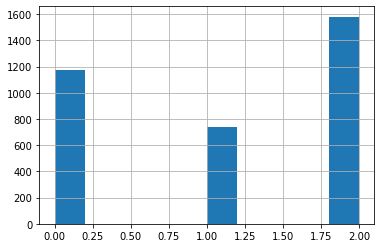

In [ ]:
test_train_cluster['cluster'].hist()

In [ ]:
#missing values
for var in test_train_cluster.columns:
    if test_train_cluster[var].isnull().sum() > 0:
        print(var, "{:.2f}".format(test_train_cluster[var].isnull().mean()),'%' )


address 0.14 %
postcode 0.14 %
state 0.14 %
country 0.14 %
property_valuation 0.14 %
first_name 0.14 %
last_name 0.28 %
gender 0.14 %
past_3_years_bike_related_purchases 0.14 %
DOB 0.14 %
Age 0.14 %
job_title 0.59 %
job_industry_category 0.40 %
wealth_segment 0.14 %
deceased_indicator 0.14 %
owns_car 0.14 %
tenure 0.14 %


In [ ]:
import cufflinks as cf

In [ ]:
cf.go_offline()

In [ ]:
test_train_cluster.iplot(kind='bar',x = 'cluster', y = 'Age')

# test train split

In [ ]:
rfm_model

,Recency,Frequency,MonetaryValue,CustomerId,cluster
0,-0.536232,2.000000,0.818598,1,1
1,1.217391,-0.666667,-0.443599,2,0
2,0.492754,0.333333,-0.134537,9,2
3,0.333333,0.666667,0.130583,12,1
4,-0.246377,0.666667,0.473417,13,1
...,...,...,...,...,...
2439,0.710145,0.333333,1.066509,3493,1
2440,-0.579710,-0.333333,-0.194596,3494,2
2441,-0.449275,0.666667,0.701518,3495,1
2442,3.072464,-0.333333,-0.296211,3496,0


In [ ]:
# Scaling with Robust Scaler
rfm_model = data_process[['Recency','Frequency','MonetaryValue']]
standar = RobustScaler()
standar.fit(rfm_model)
rfm_model = standar.transform(rfm_model)
rfm_model = pd.DataFrame(rfm_model, columns=['Recency','Frequency','MonetaryValue'])
rfm_model['CustomerId'] = data_process.index

In [ ]:
rfm_model['RFM'] = rfm_model['Recency'] + rfm_model['Frequency'] + rfm_model['MonetaryValue']

In [ ]:
rfm_model['RFM']

0       1.884970
1      -0.232915
2       2.482451
3      -0.354272
4      -0.442584
          ...   
3489   -1.451549
3490    1.008707
3491    0.846872
3492    1.195210
3493   -1.535550
Name: RFM, Length: 3494, dtype: float64

In [ ]:
 data_linear = test_train.drop(['customer_id','state','address','country','first_name','last_name','DOB','deceased_indicator','tenure','job_title'],axis = 1)

In [ ]:
data_linear

,postcode,property_valuation,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car
0,2016.0,10.0,Female,93.0,66.0,Health,Mass Customer,Yes
1,2153.0,10.0,Male,81.0,39.0,Financial Services,Mass Customer,Yes
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4211.0,9.0,Male,33.0,58.0,IT,Mass Customer,No
4,2448.0,4.0,Female,56.0,43.0,NaN,Affluent Customer,Yes
...,...,...,...,...,...,...,...,...
3489,3976.0,5.0,Female,73.0,34.0,Manufacturing,Affluent Customer,Yes
3490,3012.0,4.0,Female,28.0,24.0,Manufacturing,Mass Customer,No
3491,4073.0,9.0,Male,29.0,41.0,Manufacturing,Mass Customer,Yes
3492,2100.0,10.0,Female,71.0,53.0,Entertainment,Affluent Customer,No


In [ ]:
l = rfm_model['RFM']
l = l.values
l = pd.DataFrame(l)
l.columns = ['RFM']
l

,RFM
0,1.884970
1,-0.232915
2,2.482451
3,-0.354272
4,-0.442584
...,...
3489,-1.451549
3490,1.008707
3491,0.846872
3492,1.195210


In [ ]:
data_linear['RFM'] = l['RFM']
data_linear

,postcode,property_valuation,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,RFM
0,2016.0,10.0,Female,93.0,66.0,Health,Mass Customer,Yes,1.884970
1,2153.0,10.0,Male,81.0,39.0,Financial Services,Mass Customer,Yes,-0.232915
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.482451
3,4211.0,9.0,Male,33.0,58.0,IT,Mass Customer,No,-0.354272
4,2448.0,4.0,Female,56.0,43.0,NaN,Affluent Customer,Yes,-0.442584
...,...,...,...,...,...,...,...,...,...
3489,3976.0,5.0,Female,73.0,34.0,Manufacturing,Affluent Customer,Yes,-1.451549
3490,3012.0,4.0,Female,28.0,24.0,Manufacturing,Mass Customer,No,1.008707
3491,4073.0,9.0,Male,29.0,41.0,Manufacturing,Mass Customer,Yes,0.846872
3492,2100.0,10.0,Female,71.0,53.0,Entertainment,Affluent Customer,No,1.195210


In [ ]:
data_linear = data_linear.drop(data_linear.index[3493])

In [ ]:
data_linear

,postcode,property_valuation,gender,past_3_years_bike_related_purchases,Age,job_industry_category,wealth_segment,owns_car,RFM
0,2016.0,10.0,Female,93.0,66.0,Health,Mass Customer,Yes,1.884970
1,2153.0,10.0,Male,81.0,39.0,Financial Services,Mass Customer,Yes,-0.232915
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.482451
3,4211.0,9.0,Male,33.0,58.0,IT,Mass Customer,No,-0.354272
4,2448.0,4.0,Female,56.0,43.0,NaN,Affluent Customer,Yes,-0.442584
...,...,...,...,...,...,...,...,...,...
3488,2171.0,9.0,Male,99.0,34.0,Manufacturing,Mass Customer,Yes,2.126473
3489,3976.0,5.0,Female,73.0,34.0,Manufacturing,Affluent Customer,Yes,-1.451549
3490,3012.0,4.0,Female,28.0,24.0,Manufacturing,Mass Customer,No,1.008707
3491,4073.0,9.0,Male,29.0,41.0,Manufacturing,Mass Customer,Yes,0.846872


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_linear.drop('RFM',axis=1), data_linear['RFM'], test_size=0.1, random_state=0)

In [ ]:
print(f'Train size is {X_train.shape}' )
print(f'Test size is {X_test.shape}' )

Train size is (3143, 8)
Test size is (350, 8)


In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(data_linear)

In [ ]:
profile.to_notebook_iframe()

In [ ]:
# make list of variables  types

# numerical: discrete vs continuous
discrete = [var for var in data_linear.columns if data_linear[var].dtype!='O'  and data_linear[var].nunique()<10]
continuous = [var for var in data_linear.columns if data_linear[var].dtype!='O' ]

# categorical
categorical = [var for var in data_linear.columns if data_linear[var].dtype=='O' ]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(continuous)} continuous variables')
print(f'There are {len(categorical)} categorical variables')

There are 0 discrete variables
There are 5 continuous variables
There are 4 categorical variables


# Pre processing

In [ ]:
!pip install feature_engine

from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.variable_transformers import YeoJohnsonTransformer as YJT
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi


In [ ]:
model_preprocess = Pipeline([              
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='mean'
                                          )),                    
    ('imputer_cat', mdi.CategoricalVariableImputer()),
    # categorical encoding 
    ('OneHotCategoricalEncoder',OneHotCategoricalEncoder()),
    ('power_transform',YJT()),   #transforms variables as most of the variables are not in normal this also fixes some of the outliers
    ('scale',RobustScaler())      #scalling the values
])

In [ ]:
discrete

[]

In [ ]:
model_preprocess.fit(X_train,y_train)

In [ ]:
Val_data=NewCustomerList.drop(['first_name','last_name','Name','DOB','deceased_indicator','tenure','address','country',
                               'state','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Rank','Value','job_title'],axis=1)

In [ ]:
# Apply Transformations
X_train=model_preprocess.transform(X_train)
X_test=model_preprocess.transform(X_test)


In [ ]:
test = model_preprocess.transform(Val_data)

In [ ]:
test.shape

NameError: ignored

In [ ]:
X_train.shape

(3143, 25)

In [ ]:

X_test.shape

(350, 25)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
>>> reg = LinearRegression().fit(X_train, y_train)
>>> reg.score(X_train, y_train)

0.07570847191082075

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lr = LinearRegression().fit(X_train, y_train)
lr_cv_scores = cross_val_score(lr, X_train, y_train, cv = 5)

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(lr_cv_scores))
print("mean cv",lr_cv_scores.mean())
#print("Mean Cross-validation scores: {}", cv_scores)
# Print Co-efficients
#print("lr.coef_:", lr.coef_)
#print("lr.intercept_:", lr.intercept_)

# Check test data set performance
#print("LR Performance Test: ", lr.score(X_train,y_train))

Mean Cross-validation scores: [-0.00338912 -0.01490094 -0.00681752 -0.02126579 -0.01207581]
mean cv -0.011689835519299186


In [ ]:
# Train a SGD with GridSearchCV model, report the coefficients and model performance

from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
reg_sgd_pipe = Pipeline([

    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('sgd_reg', SGDRegressor(max_iter=10000, tol = 1e-6))
])
param_sgd = {'sgd_reg__eta0':[0.01, 0.05, 0.1 ,0.5]}
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd,cv=5, return_train_score = True)


grid_sgd.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_sgd.best_score_))
print(grid_sgd.cv_results_['mean_train_score'])
# let's get the predictions
print()

#find best parameters
print('SGD parameters: ', grid_sgd.best_params_)

# Check test data set performance

print("grid_sgd Test Performance: ", grid_sgd.score(X_test,y_test))

Best Mean Cross-validation score: -0.0105
[ 0.00398867  0.00043875 -0.00869184 -0.07279898]

SGD parameters:  {'sgd_reg__eta0': 0.01}
grid_sgd Test Performance:  -0.014532508589349957


In [ ]:
print(grid_sgd.cv_results_['mean_train_score'])

NameError: ignored

In [ ]:
# Train a Ridge regression model, report the coefficients, the best parameters, and model performance 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

#define a list of parameters
param_ridge = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }

grid_ridge = GridSearchCV(ridge, param_ridge, cv=5, return_train_score = True)
grid_ridge.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.5f}".format(grid_ridge.best_score_))

print()

# Check test data set performance

print("Ridge Test Performance: ", grid_ridge.score(X_test,y_test))

Best Mean Cross-validation score: -0.00441

Ridge Test Performance:  -0.016174530550282284


In [ ]:
# Train a Lasso regression model, report the coefficients, the best parameters, and model performance 

# YOUR CODE HERE

from sklearn.linear_model import Lasso
lasso = Lasso(random_state=0)

#define a list of parameters
param_lasso = {'alpha':[0.001, 0.01, 0.1, 1, 10, 100] }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=5, return_train_score = True)
grid_lasso.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.4f}".format(grid_lasso.best_score_))
print()


# Check test data set performance
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

Best Mean Cross-validation score: -0.0002

Lasso Test Performance:  -0.01855686770684417


In [ ]:
from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet()

#define a list of parameters
param_elasticnet = {'alpha':[0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10,100], 'l1_ratio' :[0.2,0.4,0.6,0.8]}

#grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5,verbose = 1, n_jobs = 2, scoring ='neg_root_mean_squared_error',return_train_score = True)
grid_elasticnet1 = GridSearchCV(elasticnet , param_elasticnet, cv=5,verbose = 1, n_jobs = -1, return_train_score = True)

#.fit(X_train, y_train)
grid_elasticnet1.fit(X_train, y_train)
# Mean Cross Validation Score

#print("with  scoring")
#print("Best Mean Cross-validation score: {:.4f}".format(grid_elasticnet.best_score_))
#print(grid_elasticnet.cv_results_['mean_test_score'].max())

#print("with out scoring")
print("Best Mean Cross-validation score: {:.4f}".format(grid_elasticnet1.best_score_))
print("cv_results_['mean_test_score'].max()", grid_elasticnet1.cv_results_['mean_test_score'].max())


#find best parameters
#print('grid_elasticnet parameters: ', grid_elasticnet.best_params_)


# Check test data set performance
print("grid_elasticnet Test Performance: ", grid_elasticnet1.score(X_test,y_test))



Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Mean Cross-validation score: -0.0002
cv_results_['mean_test_score'].max() -0.0002268533491926128
grid_elasticnet Test Performance:  -0.01855686770684417


[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    2.7s finished


In [ ]:
from sklearn.svm import SVR
from sklearn.svm import SVC

In [ ]:
ksvr = SVR()

In [ ]:
param_grid = [ {'kernel': ['rbf'],
               'C': [  .01,1,10,100,10000],
               'gamma': [ 0.1, 5000]},
              #{'kernel': ['linear'],
              # 'C': [ 30000,20000]}
             ]



In [ ]:
grid_search_SVM_Rbf = GridSearchCV(SVR(), param_grid, cv=5, n_jobs = -1,
                          return_train_score=True)
# {'C': 20000, 'kernel': 'linear'}
grid_search_SVM_Rbf.fit(X_train, y_train)
print('Best parameters: ', grid_search_SVM_Rbf.best_params_)
print('Best cross-validation score:', grid_search_SVM_Rbf.best_score_)

NameError: ignored

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
bag_dtree1 = BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=0), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [.01,.1,0.2,0.8,.9],
                 'n_estimators': [25,100,200,300]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True,n_jobs = -1 )
bag_dtree1_grid.fit(X_train,y_train)

In [ ]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')